# Using Logistic Regression to predict Churn status of customers

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.formula.api import logit
import numpy as np
file=open('churn.csv')
churn= pd.read_csv(file)


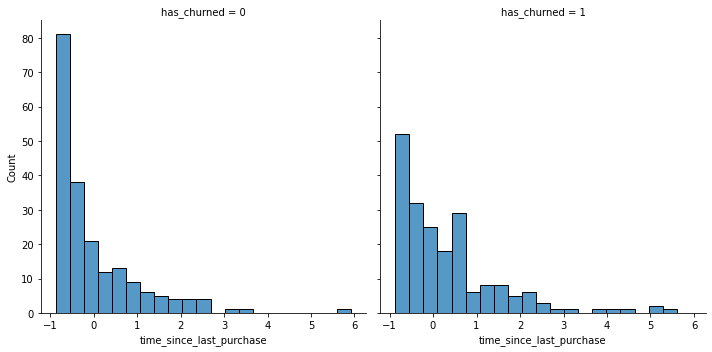

In [2]:
# histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn,x='time_since_last_purchase',col='has_churned')

plt.show()

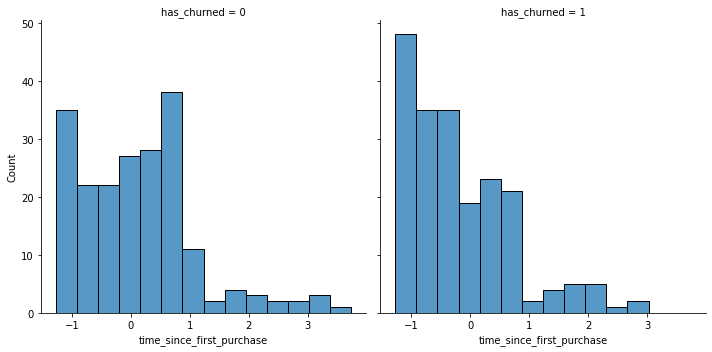

In [3]:
# Redrawing the plot with time_since_first_purchase
sns.displot(data=churn,x='time_since_first_purchase',col='has_churned')

plt.show()

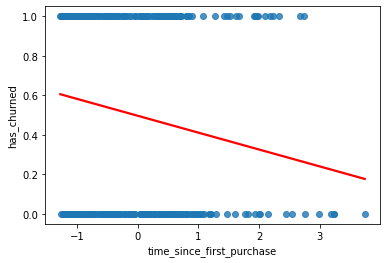

In [4]:
#a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,ci=None,
            line_kws={"color": "red"})

plt.show()

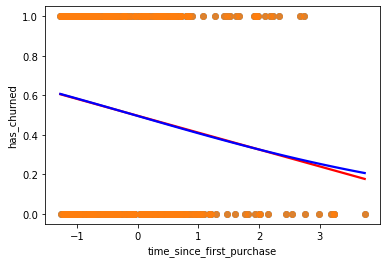

In [5]:
# a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

#a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,ci=None,logistic=True,line_kws={'color':'blue'})

plt.show()

In [6]:

# Fitting a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit('has_churned~time_since_first_purchase',data=churn).fit()

# Printing the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [8]:

mdl_churn_vs_relationship=logit('has_churned~time_since_first_purchase',data=churn).fit()
explanatory_data=pd.DataFrame({'time_since_first_purchase':np.arange(-1,6.25,0.25)})
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churn=mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
   time_since_first_purchase  has_churn
0                      -1.00   0.584096
1                      -0.75   0.562401
2                      -0.50   0.540465
3                      -0.25   0.518370
4                       0.00   0.496204


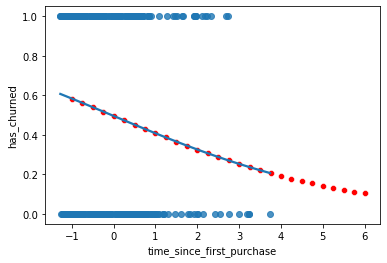

In [9]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="red")

plt.show()

In [10]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.00     0.584096                  1.0
1                      -0.75     0.562401                  1.0
2                      -0.50     0.540465                  1.0
3                      -0.25     0.518370                  1.0
4                       0.00     0.496204                  0.0


<AxesSubplot:xlabel='time_since_first_purchase', ylabel='has_churned'>

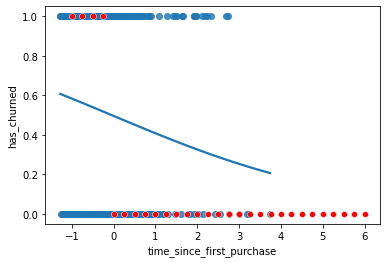

In [11]:


fig = plt.figure()

# Create a scatter plot with logistic trend line 
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="most_likely_outcome",
                data=prediction_data,
                color="red")

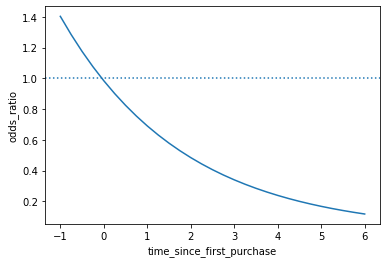

In [12]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase',y='odds_ratio',data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

# Log odds ratio


Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

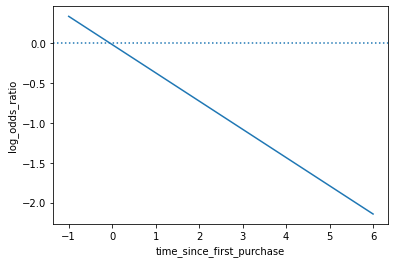

In [14]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

In [15]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response,
                         'predicted_response':predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


[[112.  88.]
 [ 76. 124.]]


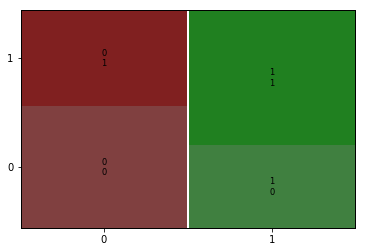

In [16]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [18]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN+TP)/(TN+TP+FN+FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP/(FN+TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN/(TN+FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
